In [2]:
import pandas as pd
import numpy as np

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulhamidadavize/top-100-best-selling-books-on-amazon-20092021")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/muskangupta/.cache/kagglehub/datasets/abdulhamidadavize/top-100-best-selling-books-on-amazon-20092021/versions/2


In [4]:
df = pd.read_excel("/Users/muskangupta/.cache/kagglehub/datasets/abdulhamidadavize/top-100-best-selling-books-on-amazon-20092021/versions/2/Amazon_top100_bestselling_books_2009to2021.xlsx")
df.head(10)

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction
5,5,18.29,6.0,StrengthsFinder 2.0,7082.0,4.1,Gallup,Hardcover,2009,Non Fiction
6,6,12.66,7.0,The Help,18068.0,4.8,Kathryn Stockett,Hardcover,2009,Fiction
7,7,17.56,8.0,New Moon (The Twilight Saga),12329.0,4.7,Stephenie Meyer,Paperback,2009,Fiction
8,8,58.90,9.0,The Twilight Saga Collection,6100.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
9,9,16.04,10.0,Outliers: The Story of Success,22209.0,4.7,Malcolm Gladwell,Hardcover,2009,Non Fiction


In [5]:
df.shape

(1291, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   float64
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 101.0+ KB


In [7]:
df.isnull().sum()

Unnamed: 0       0
price            4
ranks            4
title            5
no_of_reviews    4
ratings          4
author           5
cover_type       5
year             0
genre            3
dtype: int64

1. preprocessing

In [8]:
df['price'].fillna(df['price'].median(), inplace=True)
df['ranks'].fillna(df['ranks'].median(), inplace=True)
df['no_of_reviews'].fillna(df['no_of_reviews'].median(), inplace = True)
df['ratings'].fillna(df['ratings'].median() , inplace = True)

/var/folders/p_/8s3wcfy93cd_mbjr7fw6_6kr0000gn/T/ipykernel_35913/3784307537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)
/var/folders/p_/8s3wcfy93cd_mbjr7fw6_6kr0000gn/T/ipykernel_35913/3784307537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [9]:
df['title'].fillna('Unknown', inplace=True)
df['author'].fillna('Unknown', inplace=True)
df['cover_type'].fillna('Unknown' , inplace = True)
df['genre'].fillna('Unknown' , inplace = True)


/var/folders/p_/8s3wcfy93cd_mbjr7fw6_6kr0000gn/T/ipykernel_35913/763456845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna('Unknown', inplace=True)
/var/folders/p_/8s3wcfy93cd_mbjr7fw6_6kr0000gn/T/ipykernel_35913/763456845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [10]:
df.isnull().sum()

Unnamed: 0       0
price            0
ranks            0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
genre            0
dtype: int64

2. EDA

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'ranks'}>,
        <Axes: title={'center': 'no_of_reviews'}>],
       [<Axes: title={'center': 'ratings'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

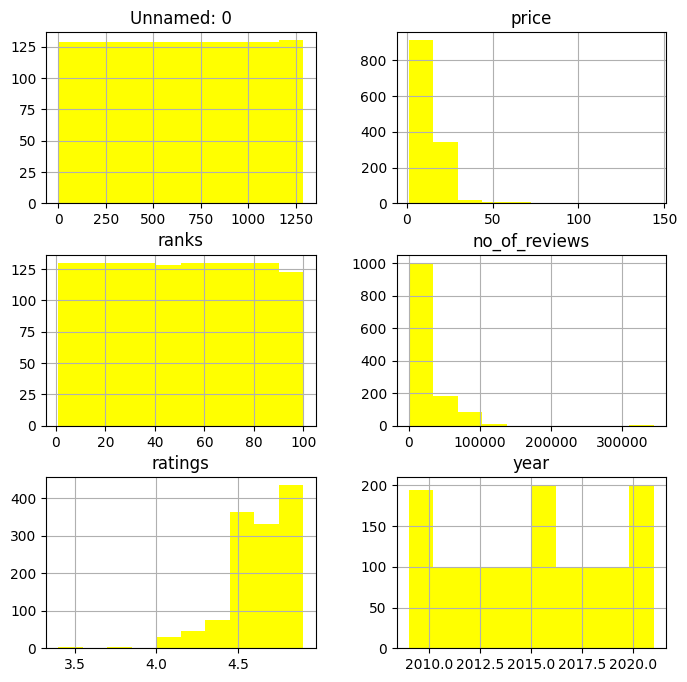

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(color = 'yellow' , figsize = (8,8))




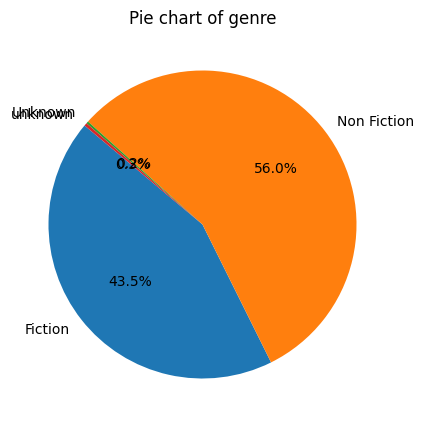

In [12]:
pie = df.groupby('genre').size().reset_index(name='counts')
#reset_index() is used to convert the groupby object into a DataFrame
#size() is used to get the size of each group
pie = pie.set_index('genre')
plt.figure(figsize=(5,5))
plt.title('Pie chart of genre')
plt.pie(pie['counts'], labels=pie.index , autopct='%1.1f%%' ,startangle=140) 
plt.show()


In [13]:
top_authors = df['author'].value_counts().nlargest(10)
top_authors

author
Rick Riordan                          20
Suzanne Collins                       17
Jeff Kinney                           17
John Grisham                          15
Gary Chapman                          13
Dr. Seuss                             13
Gallup                                13
American Psychological Association    13
Malcolm Gladwell                      12
Bill Martin Jr.                       12
Name: count, dtype: int64

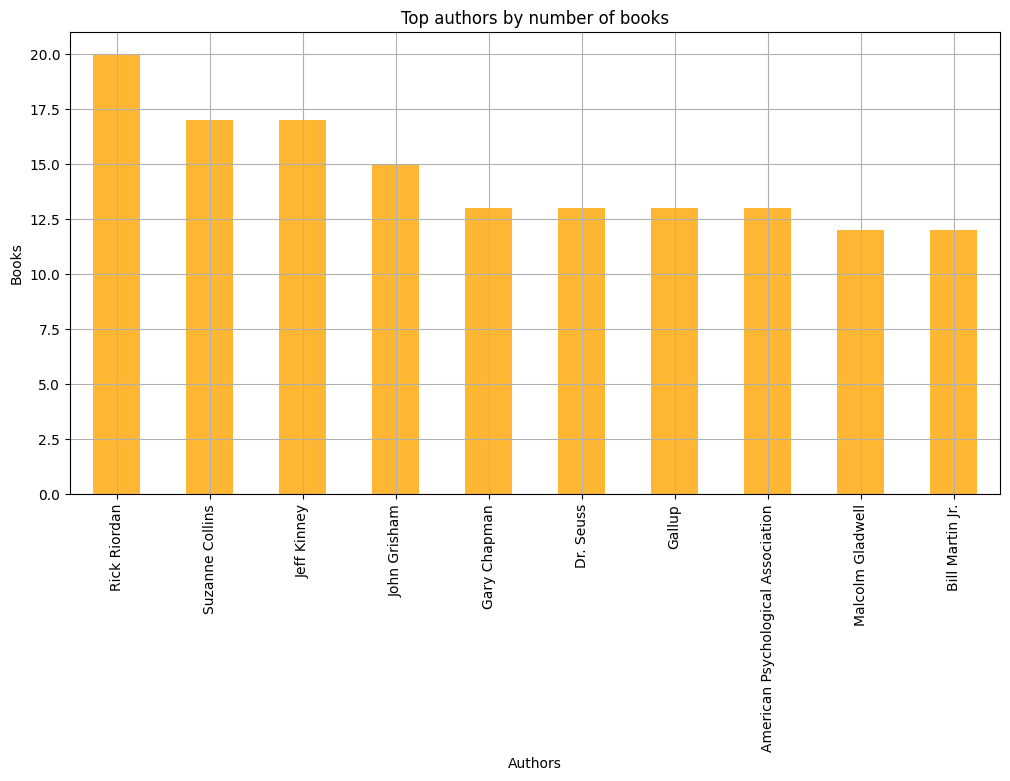

In [30]:
top_authors.plot(kind = 'bar' , figsize = (12,6) , color = 'orange' , alpha = 0.8)
plt.title('Top authors by number of books')
plt.xlabel('Authors')
plt.ylabel('Books')
plt.grid()

/var/folders/p_/8s3wcfy93cd_mbjr7fw6_6kr0000gn/T/ipykernel_35913/1925885977.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_books['title'], y=top_rated_books['no_of_reviews'], palette='viridis')


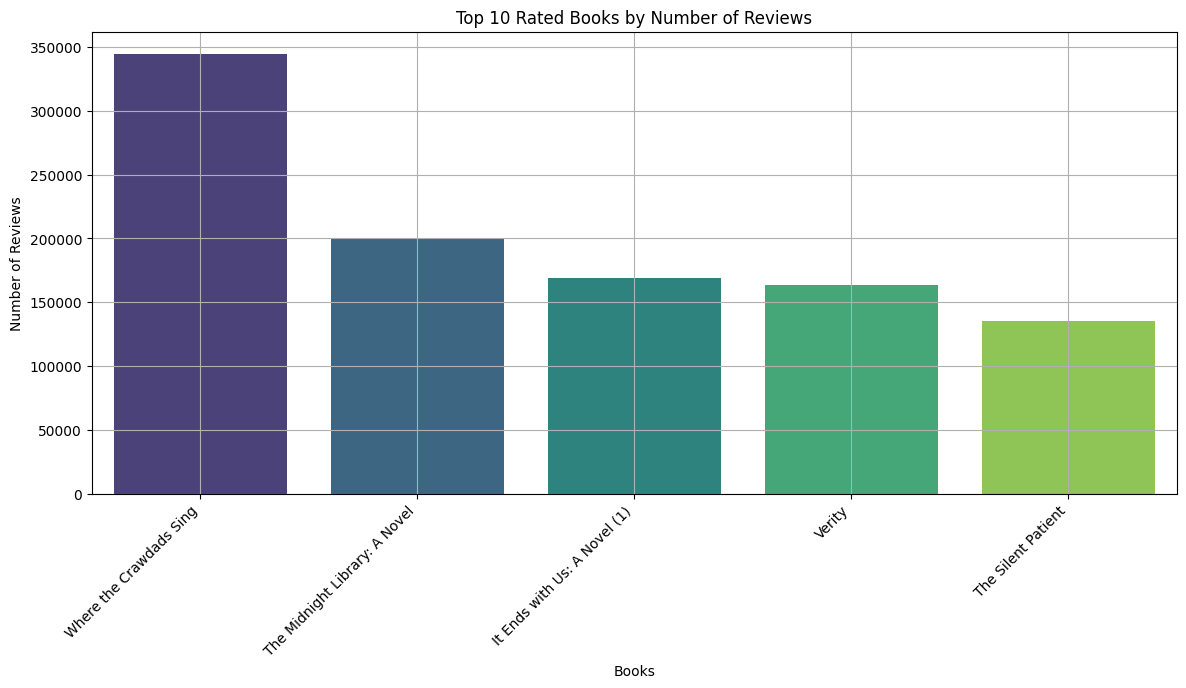

In [17]:
top_rated_books = df.sort_values('no_of_reviews', ascending=False).head(10)

plt.figure(figsize=(14,6))
sns.barplot(x=top_rated_books['title'], y=top_rated_books['no_of_reviews'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Rated Books by Number of Reviews')
plt.xlabel('Books')
plt.ylabel('Number of Reviews')
plt.grid()
plt.show()

In [18]:
most_priced_books = df.sort_values('price' , ascending = False).head(10)
most_priced_books

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
404,404,144.00,12.0,Diagnostic and Statistical Manual of Mental Di...,12114.0,4.7,American Psychiatric Association,Paperback,2013,Non Fiction
665,665,144.00,74.0,Diagnostic and Statistical Manual of Mental Di...,12114.0,4.7,American Psychiatric Association,Paperback,2015,Non Fiction
513,513,144.00,21.0,Diagnostic and Statistical Manual of Mental Di...,12114.0,4.7,American Psychiatric Association,Paperback,2014,Non Fiction
22,22,82.15,23.0,Sookie Stackhouse,995.0,4.7,Charlaine Harris,Mass Market Paperback,2009,Fiction
483,483,75.49,91.0,MyMathLab: Student Access Kit,4558.0,4.2,Hall H Pearson Education,Printed Access Code,2013,Non Fiction
548,548,65.00,57.0,Minecraft: The Complete Handbook Collection,1410.0,4.8,Stephanie Milton,Hardcover,2014,Fiction
552,552,62.50,61.0,Divergent / Insurgent / Allegiant,3064.0,4.7,Veronica Roth,Hardcover,2014,Fiction
303,303,59.90,11.0,The Hunger Games Trilogy Boxed Set,27185.0,4.8,Suzanne Collins,Hardcover,2012,Fiction
215,215,59.90,22.0,The Hunger Games Trilogy Boxed Set,27185.0,4.8,Suzanne Collins,Hardcover,2011,Fiction
8,8,58.90,9.0,The Twilight Saga Collection,6100.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction


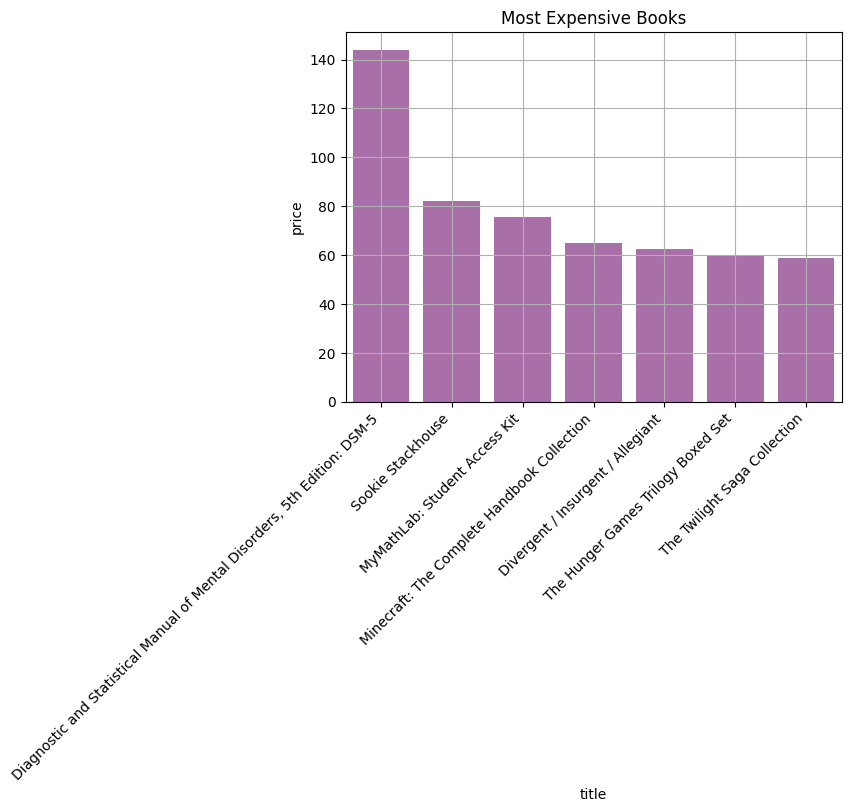

In [19]:
sns.barplot(x = most_priced_books['title'] , y = most_priced_books['price'], color = 'purple' , alpha = 0.6)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Most Expensive Books')
plt.grid()

In [20]:
highest_ranked_books = df.sort_values('ranks').head(40)
#highest_ranked_books

Text(0.5, 1.0, 'Highest Ranked Books')

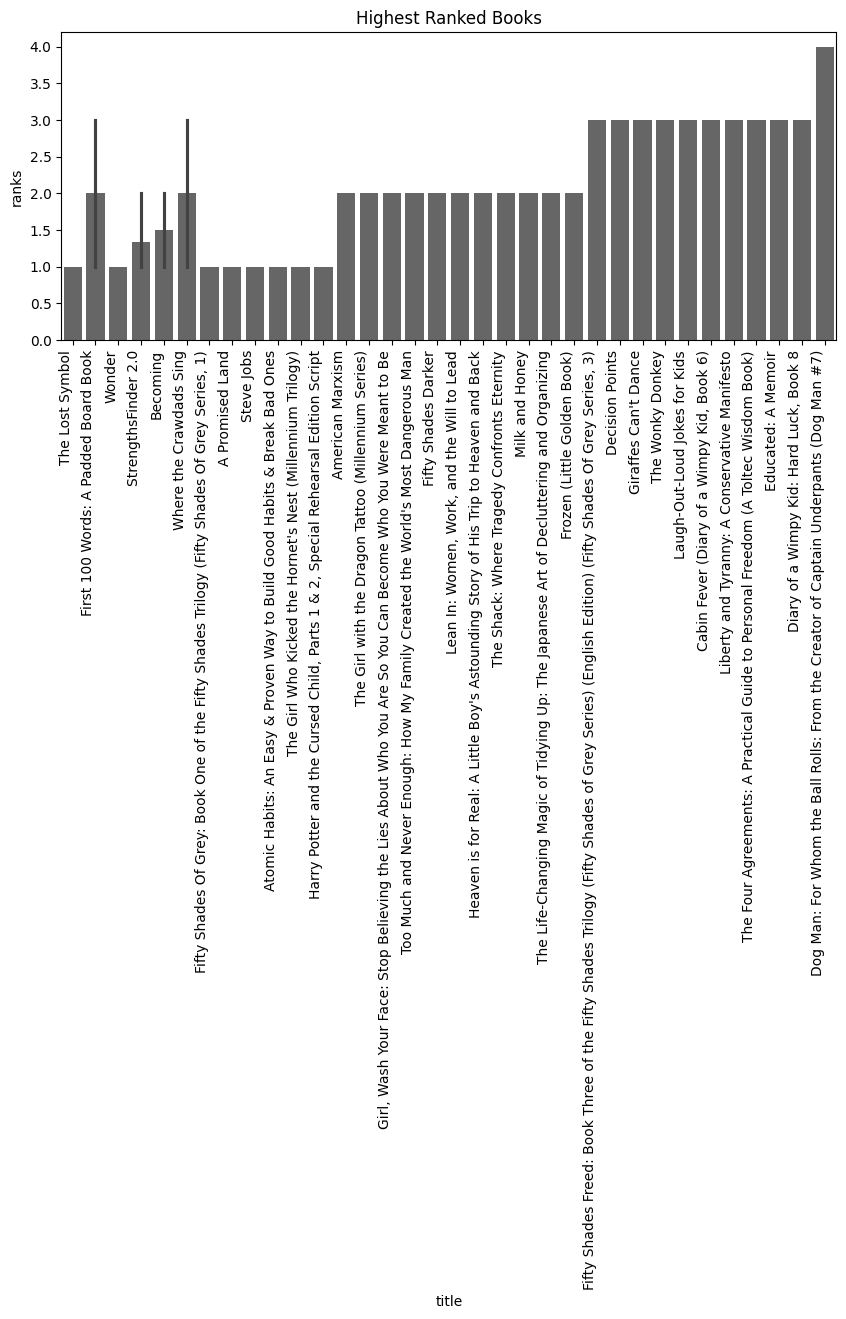

In [32]:
plt.figure(figsize = (10,4))
sns.barplot(x = highest_ranked_books['title'] , y = highest_ranked_books['ranks'], color = 'black' , alpha = 0.6)   
plt.xticks(rotation = 90, ha = 'right')
plt.title('Highest Ranked Books')

<Axes: ylabel='price'>

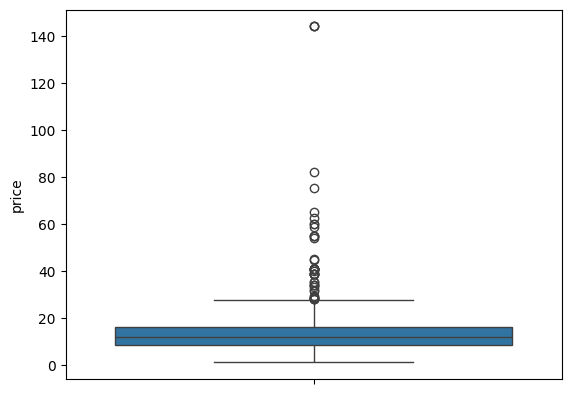

In [22]:
sns.boxplot(df['price'])

In [23]:
df = df.drop([ 'Unnamed: 0' , 'title', 'author' , 'year' ], axis=1) 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Encode the categorical columns
le_genre = LabelEncoder()
df['genre']= le_genre.fit_transform(df['genre'])  

le_cover_type = LabelEncoder()
df['cover_type'] = le_cover_type.fit_transform(df['cover_type']) 




In [24]:
X = df.drop(['genre'], axis=1)
y = df['genre']  

In [25]:
df

,price,ranks,no_of_reviews,ratings,cover_type,genre
0,12.49,1.0,16118.0,4.4,2,0
1,13.40,2.0,23392.0,4.7,5,0
2,9.93,3.0,5036.0,4.8,2,1
3,14.30,4.0,16912.0,4.7,2,0
4,9.99,5.0,1572.0,4.6,2,1
...,...,...,...,...,...,...
1286,16.69,96.0,21401.0,4.8,2,1
1287,7.49,97.0,79872.0,4.7,5,1
1288,8.95,98.0,15753.0,4.8,2,0
1289,7.59,99.0,7246.0,4.8,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 
lr = LogisticRegression(max_iter = 1000)    
lr.fit(X_train , y_train)
pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
acc


0.6833976833976834

[Text(0.512099358974359, 0.9761904761904762, 'x[2] <= 12817.5\ngini = 0.497\nsamples = 1032\nvalue = [453, 575, 2, 2]'),
 Text(0.24503205128205127, 0.9285714285714286, 'x[0] <= 12.25\ngini = 0.417\nsamples = 434\nvalue = [125.0, 307.0, 0.0, 2.0]'),
 Text(0.37856570512820514, 0.9523809523809523, 'True  '),
 Text(0.13365384615384615, 0.8809523809523809, 'x[0] <= 10.775\ngini = 0.495\nsamples = 151\nvalue = [60.0, 89.0, 0.0, 2.0]'),
 Text(0.09294871794871795, 0.8333333333333334, 'x[1] <= 62.0\ngini = 0.462\nsamples = 114\nvalue = [37, 75, 0, 2]'),
 Text(0.052564102564102565, 0.7857142857142857, 'x[3] <= 4.85\ngini = 0.511\nsamples = 65\nvalue = [29, 35, 0, 1]'),
 Text(0.047435897435897434, 0.7380952380952381, 'x[1] <= 25.5\ngini = 0.503\nsamples = 61\nvalue = [25, 35, 0, 1]'),
 Text(0.010256410256410256, 0.6904761904761905, 'x[2] <= 2756.0\ngini = 0.436\nsamples = 27\nvalue = [7, 19, 0, 1]'),
 Text(0.005128205128205128, 0.6428571428571429, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]'),

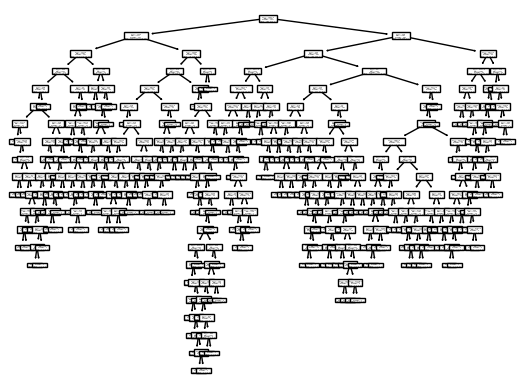

In [28]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
pred = dt.predict(X_test)
sklearn.tree.plot_tree(dt)


In [29]:
acc = accuracy_score(y_test , pred)
acc

0.7181467181467182